# Opt 画图

## header and function definition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import gzip
import os
import time
import re
from curses.ascii import isdigit

def plot_bar(x,y,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800):
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    
    leftaxis.bar(x, y, color='#4eb3d3', label='Throughput',width=bar_width,zorder=2)
    # bar的zorder取2
    for i, val in enumerate(y):
        leftaxis.text(x[i], val+text_location, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    # grid的zorder取0
    x_major_locator=MultipleLocator(bar_width*2)
    leftaxis.xaxis.set_major_locator(x_major_locator)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()
    
def readfile(src="source/graph.txt"):
    input = list()
    with open(src, "r") as f:
        readin=f.read().split("\n\n")
        temp_array = np.array([])
        for string in readin:
            if string[0].isdigit():
                blocks = string.split("\n")
                for block_ in blocks:
                    rowarray = np.fromstring(block_,dtype=float,sep=' ')
                    input.append(rowarray)
    for i,s in enumerate(input):
        input[i] = np.around(s,2)
    return input
    
np.set_printoptions(suppress=True)

def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50']):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i:
                leftaxis.text(x[j], val+text_location, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val-3*text_location, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    print(x)
    leftaxis.legend(loc=0)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()


## read file 1

In [126]:
input = readfile()
fig1_data = np.c_[input[0],input[1],input[2],input[3],input[4]]
fig2_data = np.c_[input[5:10]]
fig2_data = fig2_data.transpose()
fig3_data = np.c_[input[10:15]]
fig3_data = fig3_data.transpose()
fig4_data = (np.c_[input[15:20]]).transpose()

## Figure 1: Throughput-Shard Number

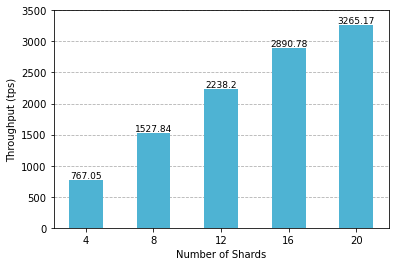

In [127]:
plot_bar(fig1_data[0,:],fig1_data[1,:],2,pic_name=1,save=True,text_location=0,ylim=3500,xlabel="Number of Shards")

## Abandon

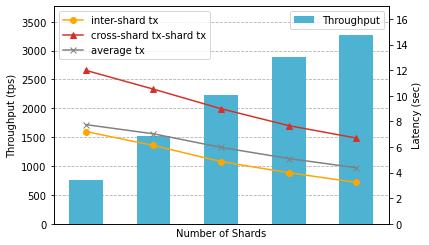

In [128]:
x = fig2_data[0,:]
ynum = np.size(fig2_data,0)
y = fig2_data[1:ynum,:]

y_plot = fig2_data[1,:]
y_bar = fig1_data[1,:]



fig, leftaxis = plt.subplots()
rightaxis = leftaxis.twinx()
bar_width = (x[1]-x[0])/2
bar_fig = leftaxis.bar(x, y_bar, color='#4eb3d3', label='Throughput',width=bar_width,zorder=2)

scatter_fig_1 = rightaxis.plot(x, y_plot, color='orange', label='inter-shard tx', marker='o',zorder=3)
scatter_fig_2 = rightaxis.plot(x, fig2_data[2,:], color='#d73027', label='cross-shard tx-shard tx', marker='^',zorder=3)
scatter_fig_3 = rightaxis.plot(x, fig2_data[3,:], color='grey', label='average tx', marker='x',zorder=3)

leftaxis.set_xlabel("Number of Shards")
leftaxis.set_ylabel("Throughput (tps)")
rightaxis.set_ylabel("Latency (sec)")

step_ybar = 500
y_limstep = 5
leftaxis.set_ylim(0, (max(y_bar)/step_ybar+1)*step_ybar)
rightaxis.set_ylim(0, max(fig2_data[2,:])+y_limstep)

rightaxis.legend(loc=2)
leftaxis.legend(loc=0)
leftaxis.grid(axis='y',linestyle='--',zorder=0)
x_major_locator=MultipleLocator(50)
leftaxis.xaxis.set_major_locator(x_major_locator)

plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+"编外"+".png", dpi=600, bbox_inches='tight')
plt.show()

## Figure 3: Latency-Shard Number

[ 4.  8. 12. 16. 20.]


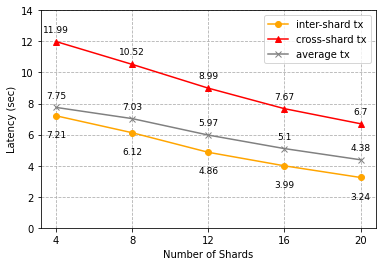

In [129]:
x = fig2_data[0,:]

plot_beta(data=fig2_data[0:ynum,:],bar_width=(x[1]-x[0])/2,pic_name=3,save=True,xlabel="Number of Shards", ylabel="Latency (sec)",text_location=0.5,ylim=14,labellist=['inter-shard tx','cross-shard tx','average tx'])


## Figure 2: Throughput-Ethereum Transaction Arrival Rate

[6. 4.]


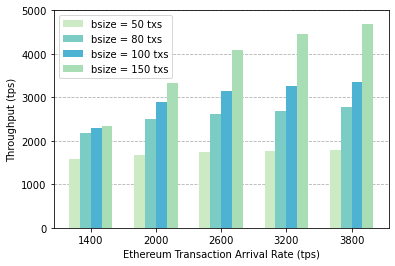

In [130]:
block_sizes = [3800,3200,2600,2000,1400]
fig, leftaxis = plt.subplots()
bar_width = 100
x = fig3_data[0,:]
leftaxis.set_ylim(0, 5000)

leftaxis.bar(x + 1 * bar_width, height=fig3_data[4,:], width=bar_width, color='#ccebc5', label='bsize = 50 txs',zorder=3)
leftaxis.bar(x + 2 * bar_width, height=fig3_data[3,:], width=bar_width, color='#7bccc4', label='bsize = 80 txs',zorder=3)
leftaxis.bar(x + 3 * bar_width, height=fig3_data[1,:], width=bar_width, color='#4eb3d3', label='bsize = 100 txs',zorder=3)
leftaxis.bar(x + 4 * bar_width, height=fig3_data[2,:], width=bar_width, color='#a8ddb5', label='bsize = 150 txs',zorder=3)

leftaxis.legend(loc="upper left")
leftaxis.set_xticks(x + 2.5 * bar_width, block_sizes)
leftaxis.set_xlabel("Ethereum Transaction Arrival Rate (tps)")
leftaxis.set_ylabel("Throughput (tps)")
leftaxis.set_zorder(5)
leftaxis.grid(axis='y',linestyle='--',zorder=0)
print(fig.get_size_inches())
plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(2)+".png", dpi=600, bbox_inches='tight')
plt.show()

## Figure 4: Latency-TX rate

[3800. 3200. 2600. 2000. 1400.  800.  200.]


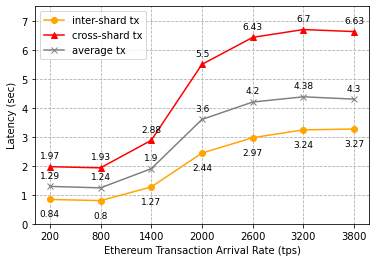

In [131]:
input_2 = readfile("source/graph_2.txt")
data_influenceTRtoL = np.r_[input_2[5:12]].transpose()
temp = np.r_[input_2[5:12]].transpose()
data_influenceTRtoL[1:4,:]=temp[2:5,:]
data_influenceTRtoL = data_influenceTRtoL[0:4]
plot_beta(data=data_influenceTRtoL,bar_width=300,pic_name=4,save=True,xlabel="Ethereum Transaction Arrival Rate (tps)", ylabel="Latency (sec)",text_location=0.22,ylim=7.5,labellist=['inter-shard tx','cross-shard tx','average tx'])

## Figure 5: Latency-TX rate

/var/folders/df/8l8w1f190kg7l4nkcnhhhdw80000gn/T/ipykernel_37450/1749855556.py:35: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  rowarray = np.fromstring(block_,dtype=float,sep=' ')


[ 50. 100. 150. 200. 250. 300. 350.]


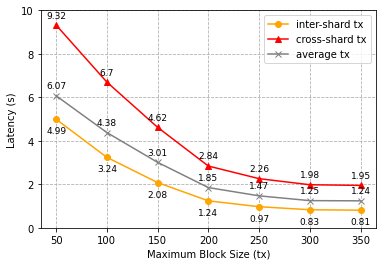

In [132]:
input_3 = readfile("source/graphupdate.txt")
data_BsizetoLatency= np.r_[input_3[22:29]].transpose()
plot_beta(data=data_BsizetoLatency,bar_width=300,pic_name=5,save=True,xlabel="Maximum Block Size (tx)", ylabel="Latency (s)",text_location=0.25,ylim=10,labellist=['inter-shard tx','cross-shard tx','average tx'])

## Figure 3: Latency-Shard Number

[ 8. 16. 24. 32.]


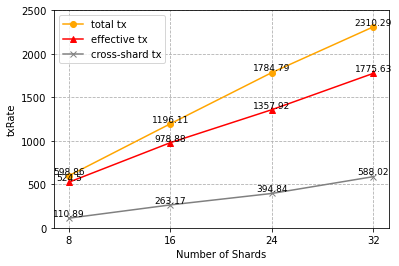

In [17]:
data=np.loadtxt("source/txRATE.txt")
data=np.round(data,2)
data = np.transpose(data)
x = data[0,:]

plot_beta(data=data,bar_width=(x[1]-x[0])/2,pic_name=10,save=True,xlabel="Number of Shards", ylabel="txRate",text_location=0,ylim=2500,labellist=['total tx','effective tx','cross-shard tx'])
